# Linear Models

In [71]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

## Dataset - Quantitative Estimation of Dehydration (Physionet)

In [114]:
# Read Dataset
FILE_NAME = 'data/dehydration/dehydration_estimation.csv'
df = pd.read_csv(FILE_NAME)

# Pre-processing
age = []
height = []
for index, row in df.iterrows():
    if np.isnan(row['age [years]']) == False:
        age.append(row['age [years]'])
        height.append(row['height [cm]'])
    else:
        age.append(age[-1])
        height.append(height[-1])
df['age [years]'] = age
df['height [cm]'] = height

df.head(3)

,id,age [years],height [cm],running speed [km/h],running interval,weight measured using Kern DE 150K2D [kg],weight measured using InBody 720 [kg],total body water using InBody 720 [l],impedance right arm at 1000kHz [Ohm],impedance left arm at 1000kHz [Ohm],impedance trunk at 1000kHz [Ohm],impedance right leg at 1000kHz [Ohm],impedance left leg at 1000kHz [Ohm],temperature ear [degree C],temperature left hand [degree C],temperature right hand [degree C],temperature left foot [degree C],temperature right foot [degree C],temperature chest [degree C],temperature back [degree C],temperature upper arm [degree C],temperature lower arm [degree C],temperature upper leg [degree C],temperature lower leg [degree C],sweat chloride [mmol/l],sweat osmolality [mmol/kg],salivary amylase [units/l],salivary chloride [mmol/l],salivary cortisol [ng/ml],salivary cortisone [ng/ml],salivary osmolality [mmol/kg],salivary potassium [mmol/l],salivary protein concentration [mg/l]
0,1,29.0,190.0,8.0,0,85.515,85.90,54.0,231.27,232.63,14.98,205.04,212.04,36.7,32.6,31.9,27.9,28.3,32.8,33.7,32.2,32.0,31.6,31.9,NaN,NaN,NaN,28.0,NaN,NaN,76.0,NaN,576.8
1,1,29.0,190.0,NaN,1,85.275,85.56,53.7,234.75,240.08,14.99,194.27,200.90,36.3,31.1,30.8,31.3,32.0,31.2,33.3,30.4,31.9,32.1,31.3,56.0,146.0,NaN,29.0,NaN,NaN,78.0,NaN,544.1
2,1,29.0,190.0,NaN,2,84.895,85.32,54.0,230.81,233.95,14.84,196.97,202.51,36.2,31.0,31.2,32.3,32.9,30.8,33.0,30.0,29.8,29.2,31.2,55.0,134.0,111700.0,35.0,1.24,11.8,84.0,37.0,537.3


In [136]:
# Split train and test dataset
np.random.seed(10)
indices = np.random.permutation(df['id'].unique())
df_train = df[df['id'].isin(indices[:8])]
df_test = df[df['id'].isin(indices[8:])]

X_train = df_train[[
        'height [cm]', 
        'weight measured using InBody 720 [kg]',
        'impedance right arm at 1000kHz [Ohm]',
        'impedance left arm at 1000kHz [Ohm]',
        'impedance trunk at 1000kHz [Ohm]',
        'impedance right leg at 1000kHz [Ohm]',
        'impedance left leg at 1000kHz [Ohm]',
        'temperature ear [degree C]',
        'temperature left hand [degree C]',
        'temperature right hand [degree C]',
        'temperature left foot [degree C]',
        'temperature right foot [degree C]',
        'temperature chest [degree C]',
        'temperature back [degree C]',
        'temperature upper arm [degree C]',
        'temperature lower arm [degree C]',
        'temperature upper leg [degree C]',
        'temperature lower leg [degree C]'
                   ]]
y_train = df_train['total body water using InBody 720 [l]']

X_test = df_test[[
        'height [cm]', 
        'weight measured using InBody 720 [kg]',
        'impedance right arm at 1000kHz [Ohm]',
        'impedance left arm at 1000kHz [Ohm]',
        'impedance trunk at 1000kHz [Ohm]',
        'impedance right leg at 1000kHz [Ohm]',
        'impedance left leg at 1000kHz [Ohm]',
        'temperature ear [degree C]',
        'temperature left hand [degree C]',
        'temperature right hand [degree C]',
        'temperature left foot [degree C]',
        'temperature right foot [degree C]',
        'temperature chest [degree C]',
        'temperature back [degree C]',
        'temperature upper arm [degree C]',
        'temperature lower arm [degree C]',
        'temperature upper leg [degree C]',
        'temperature lower leg [degree C]'
                   ]]
y_test = df_test['total body water using InBody 720 [l]']

## Linear Regression

In [137]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

reg = linear_model.LinearRegression()

reg.fit(X_train, y_train)
print ('Coefficients: \n', reg.coef_)
print ('Intercept: \n', reg.intercept_)

y_pred = reg.predict(X_test)

print ('Mean Squared Error: %.2f' % mean_squared_error(y_test, y_pred))
print ('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))


Coefficients: 
 [ 0.45937487  0.29005939 -0.06512946 -0.02290289 -0.54757771 -0.09016488
  0.07959516 -0.32036362 -0.26592269  0.38421808 -0.00375791 -0.01951084
 -0.09043835 -0.14987065  0.2141813   0.02575888 -0.034836   -0.41206971]
Intercept: 
 -4.283605898204954
Mean Squared Error: 5.12
Coefficient of determination: 0.88


## Ridge Regression

In [138]:
reg = linear_model.Ridge(alpha=.5)
reg.fit(X_train, y_train)

print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

y_pred = reg.predict(X_test)

print ('Mean Squared Error: %.2f' % mean_squared_error(y_test, y_pred))
print ('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [ 0.46326047  0.28707476 -0.06410609 -0.02405416 -0.53432552 -0.09097965
  0.07888213 -0.29953153 -0.25232686  0.37004309 -0.0029884  -0.02179232
 -0.09389707 -0.14835829  0.21000039  0.03010429 -0.04702663 -0.39885127]
Intercept: 
 -5.2945809993947535
Mean Squared Error: 4.99
Coefficient of determination: 0.88


## Lasso Regression

In [150]:
reg = linear_model.Lasso(alpha=0.34)
reg.fit(X_train, y_train)

print ('Coeffcients: \n', reg.coef_)
print ('Intercept: \n', reg.intercept_)

y_pred = reg.predict(X_test)

print ('Mean Squared Error: %.2f' % mean_squared_error(y_test, y_pred))
print ('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Coeffcients: 
 [ 0.58855217  0.08873884 -0.         -0.06032629 -0.         -0.05261877
  0.         -0.          0.          0.         -0.         -0.01788141
 -0.         -0.         -0.         -0.         -0.         -0.        ]
Intercept: 
 -39.169904826839215
Mean Squared Error: 1.59
Coefficient of determination: 0.96


### Lasso Model Selection

In [140]:
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC

EPSILON = 1e-4

#### LassoLarsIC: Least angle regression with BIC/AIC criterion

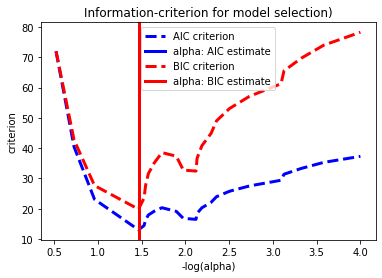

In [151]:
model_bic = LassoLarsIC(criterion='bic')
model_bic.fit(X_train, y_train)
alpha_bic_ = model_bic.alpha_

model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X_train, y_train)
alpha_aic = model_aic.alpha_

def plot_ic_criterion(model, name, color):
    alpha_ = model.alpha_ + EPSILON
    alphas_ = model.alphas_ + EPSILON
    
    criterion_ = model.criterion_
    
    plt.plot(-np.log10(alphas_), criterion_, '--', color=color,
            linewidth=3, label='%s criterion' % name)
    
    plt.axvline(-np.log10(alpha_), color=color, linewidth=3,
               label='alpha: %s estimate'% name)
    plt.xlabel('-log(alpha)')
    plt.ylabel('criterion')
    
plt.figure()
plot_ic_criterion(model_aic, 'AIC', 'b')
plot_ic_criterion(model_bic, 'BIC', 'r')
plt.legend()
plt.title('Information-criterion for model selection)')
plt.axis('tight')
plt.show()

#### LassoCV: coordinate descent

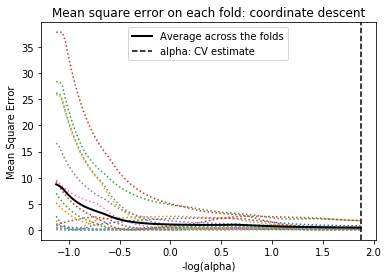

In [153]:
model = LassoCV(cv=20).fit(X_train, y_train)

m_log_alphas = -np.log10(model.alphas_ + EPSILON)

plt.figure()
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
        label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_ + EPSILON), linestyle='--', color='k',
           label='alpha: CV estimate')

plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean Square Error')
plt.title('Mean square error on each fold: coordinate descent')
plt.axis('tight')
plt.show()

#### LassoLarsCV: least angle regression

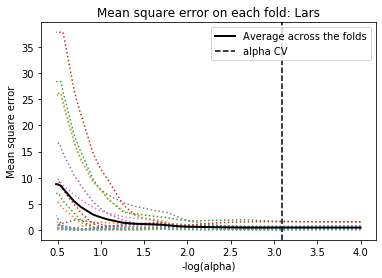

In [154]:
model = LassoLarsCV(cv=20).fit(X_train, y_train)

m_log_alphas = -np.log10(model.cv_alphas_+EPSILON)

plt.figure()
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
        label = 'Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
           label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: Lars')
plt.axis('tight')
plt.show()